Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0281 - loss: 1.1055    
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3586 - loss: 1.0737 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4382 - loss: 1.0442 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4486 - loss: 1.0091 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5607 - loss: 0.9267 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4911 - loss: 0.8900 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4629 - loss: 0.8769     
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5951 - loss: 0.8402 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7581 - loss: 0.7559 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.7039 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.7523 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.83

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


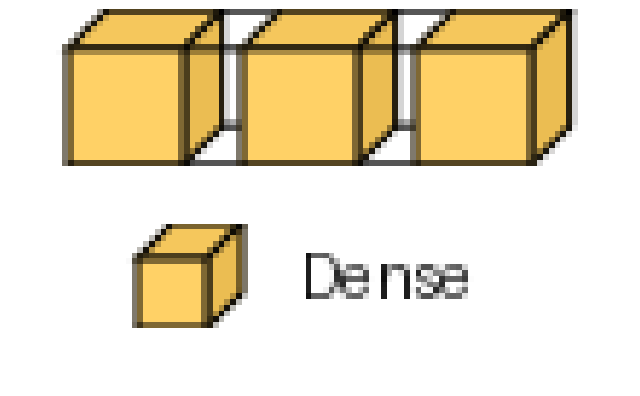

In [3]:
# Import libraries
!pip install visualkeras
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import visualkeras
import matplotlib.pyplot as plt

# 1. Load Dataset
iris = load_iris()
X = iris.data   # Features (sepal length, sepal width, petal length, petal width)
y = iris.target # Labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# 2. Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)   # Normalize features

y = to_categorical(y)   # One-hot encode labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build Neural Network Model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))   # Hidden Layer 1
model.add(Dense(6, activation='relu'))                # Hidden Layer 2
model.add(Dense(3, activation='softmax'))             # Output Layer (3 classes)

# 4. Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train Model
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

# 6. Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# 7. Visualize Neural Network
# Generate the network image
img = visualkeras.layered_view(model, legend=True)

# Show it with matplotlib
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off')
plt.show()